# DA3-A3 
## Parker & Co. -1
Peter Szilvasi,
Máté Schieszler 

In [1]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
import warnings

warnings.filterwarnings("ignore")

In [2]:
from py_helper_functions import *

In [3]:
# Read in the data offline
original_data = pd.read_csv('cs_bisnode_panel.csv')

In [4]:
# Read in the data online
#original_data = pd.read_csv('https://raw.githubusercontent.com/mateschieszler/DA3-A3/main/cs_bisnode_panel.csv')

In [5]:
# copy original so we don't have to reload it every time (it takes more than 10s)
data = original_data.copy()

In [6]:
# filter out ind2 != 26
# data = data.loc[data['ind2'] == 26] # i would comment this out 
# data['sales'].fillna(0, inplace=True)
data.shape

(287829, 48)

In [7]:
# add all missing year and comp_id combinations -
# originally missing combinations will have NAs in all other columns
data = (
    data.set_index(["year", "comp_id"])
    .unstack(fill_value="toReplace")
    .stack()
    .reset_index()
)
data = data.replace("toReplace", np.nan)  # only way I could define it as NaN

In [8]:
# generate status_alive; if sales larger than zero and not-NA, then firm is alive
data["status_alive"] = (data["sales"] > 0 & (False == data["sales"].isna())).astype(int)

# defaults in one year if there are sales in this year but no sales the next year
# Status_in_a_year: data.groupby('comp_id')['status_alive'].shift(-1)
data["default"] = (
    (data["status_alive"] == 1)
    & (data.groupby("comp_id")["status_alive"].shift(-1) == 0)
).astype(int)

In [9]:
data.loc[data['year'] == 2014].groupby(["status_alive","default"])['comp_id'].count()

status_alive  default
0             0          24060
1             0          19885
              1           2467
Name: comp_id, dtype: int64

In [10]:
# filter for status alive = 1
data = data.loc[data["status_alive"] == 1]

In [11]:
data["default"].describe()

count    238491.000000
mean          0.154182
std           0.361124
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: default, dtype: float64

In [12]:
holdout_set = data.loc[(data['ind2'] == 26) & (data['year'] == 2014) & (data['sales'] >= 1000) & (data['sales'] <= 10000000)]

# Display information about the resulting holdout set
print("Total firms in holdout set:", len(holdout_set))
print("Number of defaulted firms:", len(holdout_set[holdout_set['default'] == 1]))
print("Number of firms that stayed alive:", len(holdout_set[holdout_set['default'] == 0]))  # Since all firms meet the condition
print("Average sales of the firms:", holdout_set['sales'].mean())
print("Minimum sales:", holdout_set['sales'].min())
print("Maximum sales:", holdout_set['sales'].max())

Total firms in holdout set: 1037
Number of defaulted firms: 56
Number of firms that stayed alive: 981
Average sales of the firms: 490202.21792682
Minimum sales: 1070.370361328125
Maximum sales: 9576485.0


In [13]:
data.shape

(238491, 50)

In [14]:
# with this -> data = working set
# data = data.drop(holdout_set.index)

## Handling Missing Values

In [15]:
# drop year 2015 and 2016
data = data.loc[data['year'] <= 2014]

In [16]:
# look at missing values
data.isna().sum()

year                         0
comp_id                      0
begin                        0
end                          0
COGS                    191311
amort                      433
curr_assets                 80
curr_liab                   80
extra_exp                 1072
extra_inc                 1072
extra_profit_loss           10
finished_prod           192185
fixed_assets                80
inc_bef_tax                  0
intang_assets               89
inventories                 80
liq_assets                  80
material_exp               433
net_dom_sales           191311
net_exp_sales           191311
personnel_exp              433
profit_loss_year            80
sales                        0
share_eq                    80
subscribed_cap              80
tang_assets               1151
wages                   191550
D                       206922
balsheet_flag                0
balsheet_length              0
balsheet_notfullyear         0
founded_year             42396
exit_yea

In [17]:
# Calculate percentage of missing values in each column of the original dataset
original_missing_percentage = (original_data.isnull().sum() / len(original_data)) * 100

# Calculate percentage of missing values in each column of the filtered dataset
filtered_missing_percentage = (data.isnull().sum() / len(data)) * 100

# Calculate percentage of missing values in each column of the filtered dataset
filtered_missing_percentage = (data.isnull().sum() / len(data)) * 100

# Combine the missing percentage information into a DataFrame for easier comparison
missing_info = pd.DataFrame({
    'Original Data Missing %': original_missing_percentage,
    'Filtered Data Missing %': filtered_missing_percentage
})

missing_info.sort_values(by='Filtered Data Missing %', ascending=False)

,Original Data Missing %,Filtered Data Missing %
D,100.000000,100.000000
finished_prod,93.925213,92.877993
wages,93.752193,92.571114
COGS,93.656998,92.455611
net_exp_sales,93.656998,92.455611
net_dom_sales,93.656998,92.455611
exit_year,86.499276,86.066247
exit_date,80.481466,80.203652
labor_avg,50.909394,48.395047
birth_year,38.848761,39.943070


Would it makes sense to examine all original data as it might have some additinal info which might uncover relations that are not present in our data?

In [18]:
# drop columns with over 12000 missing values
to_drop = ['D','exit_year','wages','finished_prod','COGS','net_exp_sales','net_dom_sales','exit_date']
data = data.drop(to_drop, axis=1)

In [19]:
# drop where industry is empty, itt nem tudom ezt kell e, vagy csak flageljük
# data = data.dropna(subset="ind2")

In [20]:
data

,year,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,labor_avg,status_alive,default
0,2005,1.001034e+06,2005-01-01,2005-12-31,692.592590,7.266667e+03,7.574074e+03,0.000000,0.000000,0.000000,...,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,1,0
3,2005,1.003200e+06,2005-01-01,2005-12-31,25.925926,7.296296e+02,3.803704e+03,0.000000,4814.814941,4814.814941,...,NaN,5630.0,56.0,3.0,1.0,Central,2003-10-21,NaN,1,0
4,2005,1.004012e+06,2005-01-01,2005-12-31,114.814812,1.648148e+03,3.777778e+03,0.000000,0.000000,0.000000,...,Domestic,3314.0,33.0,2.0,3.0,West,1991-11-24,NaN,1,0
7,2005,1.011889e+06,2005-01-01,2005-12-31,51625.925781,3.500370e+04,4.988889e+03,0.000000,31925.925781,31925.925781,...,Domestic,5510.0,55.0,3.0,2.0,West,1992-11-09,NaN,1,0
8,2005,1.014183e+06,2005-01-01,2005-12-31,12692.592773,7.918889e+04,2.777778e+03,0.000000,1481.481445,1481.481445,...,Domestic,5510.0,55.0,3.0,2.0,Central,2001-12-21,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464110,2014,4.639265e+11,2014-06-05,2014-12-31,407.407410,3.383704e+04,2.767407e+04,0.000000,0.000000,0.000000,...,Domestic,5610.0,56.0,3.0,3.0,West,2014-06-04,0.166667,1,1
464112,2014,4.639820e+11,2014-01-01,2014-12-31,7551.852051,8.765185e+04,1.156741e+05,0.000000,0.000000,0.000000,...,Domestic,2822.0,28.0,2.0,1.0,Central,1995-05-14,0.597222,1,0
464114,2014,4.640212e+11,2014-01-01,2014-12-31,5666.666504,1.528519e+04,1.488889e+03,0.000000,0.000000,0.000000,...,Domestic,2822.0,28.0,2.0,2.0,Central,2006-05-09,0.101852,1,0
464115,2014,4.640446e+11,2014-01-01,2014-12-31,71570.367188,6.486366e+06,2.499133e+06,0.000000,0.000000,0.000000,...,Foreign,3312.0,33.0,2.0,3.0,Central,2008-10-09,2.305556,1,0


# Label Engineering

In [21]:
data["default"].describe()

count    206922.000000
mean          0.117010
std           0.321433
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: default, dtype: float64

In [22]:
data["sales"].describe()

count    2.069220e+05
mean     5.712713e+05
std      4.188716e+06
min      1.851852e-01
25%      1.413056e+04
50%      4.370000e+04
75%      1.383315e+05
max      1.110294e+08
Name: sales, dtype: float64

In [23]:
data["sales"] = np.where(
    data["sales"] < 0, 1, data["sales"]
)  # Replaces negative values in the "sales" column with 1
data = data.assign( # Assigns new columns to the data
    ln_sales=np.where( # Natural logarithm of sales if sales is larger than 0
        data["sales"] > 0, 
        np.log(data["sales"]), 
        (np.where(data["sales"].isna(), np.nan, 0))),  # NaN remain NaN
    sales_mil=data["sales"] / 1000000, # Sales in millions
    sales_mil_log=np.where( # Natural logarithm of sales in millions if sales is larger than 0
        data["sales"] > 0, 
        np.log(data["sales"] / 1000000),
        (np.where(data["sales"].isna(), np.nan, 0)), # NaN remain NaN
    ),
)

In [24]:
data[["sales", "ln_sales", "sales_mil", "sales_mil_log"]].isna().sum()

sales            0
ln_sales         0
sales_mil        0
sales_mil_log    0
dtype: int64

In [25]:
data["sales"].describe()

count    2.069220e+05
mean     5.712713e+05
std      4.188716e+06
min      1.851852e-01
25%      1.413056e+04
50%      4.370000e+04
75%      1.383315e+05
max      1.110294e+08
Name: sales, dtype: float64

In [26]:
# This difference indicates how the logarithm of sales in millions changes from one period to the next for each company.
# It's often used to capture the rate of change or momentum in a time series.
data["d1_sales_mil_log"] = data["sales_mil_log"] - data.groupby("comp_id")[
    "sales_mil_log"
].shift(1)

In [27]:
# replace w 0 for new firms + add dummy to capture it

# add age of firm
data["age"] = np.where(
    data["year"] - data["founded_year"] < 0, 0, data["year"] - data["founded_year"])

# add dummy for new firms
data["new"] = np.where(
    ((data["age"] <= 1) | (data["balsheet_notfullyear"] == 1)),
    1,
    (np.where(data["age"].isna(), np.nan, 0)))

# replace d1_sales_mil_log with 0 for new firms
data["d1_sales_mil_log"] = np.where(
    data["new"] == 1, 0, np.where(data["new"].isna(), np.nan, data["d1_sales_mil_log"]))

# replace new with 0 for firms with missing d1_sales_mil_log
data["new"] = np.where(data["d1_sales_mil_log"].isna(), 1, data["new"])

# replace d1_sales_mil_log with 0 for firms with missing d1_sales_mil_log
data["d1_sales_mil_log"] = np.where(
    data["d1_sales_mil_log"].isna(), 0, data["d1_sales_mil_log"])

# Feature Engineering

In [28]:
#######################
### Decide here for cross section or panel
#######################
# look at cross section
#data=data.query('year==2014 & status_alive == 1')
# look at firms below 10m euro revenues and above 1000 euros
data=data.query('sales_mil<=10 & sales_mil>=0.001')

In [29]:
data.shape

(197242, 48)

In [30]:
data['default'].describe()

count    197242.000000
mean          0.107523
std           0.309777
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: default, dtype: float64

In [31]:
data.isna().sum()

year                        0
comp_id                     0
begin                       0
end                         0
amort                     334
curr_assets                70
curr_liab                  70
extra_exp                1023
extra_inc                1023
extra_profit_loss           8
fixed_assets               70
inc_bef_tax                 0
intang_assets              77
inventories                70
liq_assets                 70
material_exp              334
personnel_exp             334
profit_loss_year           70
sales                       0
share_eq                   70
subscribed_cap             70
tang_assets              1092
balsheet_flag               0
balsheet_length             0
balsheet_notfullyear        0
founded_year            40100
ceo_count               40077
foreign                 40077
female                  40077
birth_year              77210
inoffice_days           40077
gender                  40077
origin                  40077
nace_main 

In [32]:
data['ind2_cat']=data['ind2'].copy() # lets create this but skip the recategorization for now
data['ind2_cat']=np.where(data['ind2']>56,60,data['ind2_cat'])
data['ind2_cat']=np.where(data['ind2']<26,20,data['ind2_cat'])
data['ind2_cat']=np.where((data['ind2']<55)&(data['ind2']>35),40,data['ind2_cat'])
data['ind2_cat']=np.where(data['ind2']==31,30,data['ind2_cat'])
data['ind2_cat']=np.where(data['ind2'].isna(),99,data['ind2_cat'])

In [33]:
data.groupby('ind2_cat').count()['comp_id']

ind2_cat
20.0       485
26.0     10726
27.0      6492
28.0     19333
29.0      2762
30.0      1628
32.0      1481
33.0     16451
35.0         1
40.0      1951
55.0     20398
56.0    112588
60.0      2302
99.0       644
Name: comp_id, dtype: int64

In [34]:
# Firm characteristics
data["age2"] = data["age"] ** 2
data["foreign_management"] = np.where(
    data["foreign"] >= 0.5, 1, np.where(data["foreign"].isna(), np.nan, 0)
)
data["gender_m"] = data["gender"].astype("category")
data["m_region_loc"] = data["region_m"].astype("category")

In [35]:
###########################################################
# look at more financial variables, create ratios
###########################################################

# assets can't be negative. Change them to 0 and add a flag.
data["flag_asset_problem"] = np.where(
    (
        (data["intang_assets"] < 0)
        | (data["curr_assets"] < 0)
        | (data["fixed_assets"] < 0)
    ),
    1,
    0,
)
data["flag_asset_problem"] = np.where(
    (
        (data["intang_assets"].isna())
        | (data["curr_assets"].isna())
        | (data["fixed_assets"].isna())
    ),
    np.nan,
    data["flag_asset_problem"],
)
data.groupby("flag_asset_problem").count()["comp_id"]

flag_asset_problem
0.0    197046
1.0       119
Name: comp_id, dtype: int64

In [36]:
data["intang_assets"] = np.where(data["intang_assets"] < 0, 0, data["intang_assets"])
data["curr_assets"] = np.where(data["curr_assets"] < 0, 0, data["curr_assets"])
data["fixed_assets"] = np.where(data["fixed_assets"] < 0, 0, data["fixed_assets"])

In [37]:
# generate total assets
data["total_assets_bs"] = (
    data["intang_assets"] + data["curr_assets"] + data["fixed_assets"]
)
data["total_assets_bs"].describe()

count    1.971650e+05
mean     4.128472e+05
std      3.049237e+07
min      0.000000e+00
25%      7.818519e+03
50%      2.645185e+04
75%      1.013815e+05
max      1.032471e+10
Name: total_assets_bs, dtype: float64

In [38]:
pl_names = [
    "extra_exp",
    "extra_inc",
    "extra_profit_loss",
    "inc_bef_tax",
    "inventories",
    "material_exp",
    "profit_loss_year",
    "personnel_exp",
]
bs_names = [
    "intang_assets",
    "curr_liab",
    "fixed_assets",
    "liq_assets",
    "curr_assets",
    "share_eq",
    "subscribed_cap",
    "tang_assets",
]

In [39]:
# divide all pl_names elements by sales and create new column for it
data[[col + "_pl" for col in pl_names]] = data[pl_names].div(
    data["sales"], axis="index"
)

In [40]:
# divide all bs_names elements by total_assets_bs and create new column for it
data[[col + "_bs" for col in bs_names]] = (
    data[bs_names]
    .div(data["total_assets_bs"], axis="index")
    .replace((np.inf, -np.inf, np.nan), (0, 0, 0))
)
# get Nan values where total_assets_bs is NaN
for col in bs_names:
    data[col + "_bs"] = np.where(
        data["total_assets_bs"].isna(), np.nan, data[col + "_bs"]
    )

In [41]:
########################################################################
# creating flags, and winsorizing tails
########################################################################

# Variables that represent accounting items that cannot be negative (e.g. materials)
zero = [
    "extra_exp_pl",
    "extra_inc_pl",
    "inventories_pl",
    "material_exp_pl",
    "personnel_exp_pl",
    "curr_liab_bs",
    "fixed_assets_bs",
    "liq_assets_bs",
    "curr_assets_bs",
    "subscribed_cap_bs",
    "intang_assets_bs",
]

data[[col + "_flag_high" for col in zero]] = np.where(
    data[zero].isna(), np.nan, (data[zero] > 1).astype(int)
)
data[[col for col in zero]] = np.where(
    data[zero].isna(), np.nan, np.where(data[zero] > 1, 1, data[zero])
)
data[[col + "_flag_error" for col in zero]] = np.where(
    data[zero].isna(), np.nan, (data[zero] < 0).astype(int)
)
data[[col for col in zero]] = np.where(
    data[zero].isna(), np.nan, np.where(data[zero] < 0, 0, data[zero])
)

In [42]:
# for vars that could be any, but are mostly between -1 and 1
anyof = ["extra_profit_loss_pl", "inc_bef_tax_pl", "profit_loss_year_pl", "share_eq_bs"]

data[[col + "_flag_low" for col in anyof]] = np.where(
    data[anyof].isna(), np.nan, (data[anyof] < -1).astype(int)
)
data[[col for col in anyof]] = np.where(
    data[anyof].isna(), np.nan, np.where((data[anyof] < -1), -1, data[anyof])
)
data[[col + "_flag_high" for col in anyof]] = np.where(
    data[anyof].isna(), np.nan, (data[anyof] > 1).astype(int)
)
data[[col for col in anyof]] = np.where(
    data[anyof].isna(), np.nan, np.where((data[anyof] > 1), 1, data[anyof])
)
data[[col + "_flag_zero" for col in anyof]] = np.where(
    data[anyof].isna(), np.nan, (data[anyof] == 0).astype(int)
)
data[[col + "_quad" for col in anyof]] = np.where(
    data[anyof].isna(), np.nan, data[anyof] ** 2
)

In [43]:
# dropping flags with no variation
flag_columns = [col for col in data.columns if "flag" in col]
data = data.drop(
    data[flag_columns].std()[(data[flag_columns].std() == 0)].index, axis=1
)
# ok

In [44]:
########################################################################
# additional
# including some imputation
########################################################################

# CEO age
data["ceo_age"] = data["year"] - data["birth_year"]
data = data.assign(
    flag_low_ceo_age=(data["ceo_age"] < 25).astype(int),
    flag_high_ceo_age=(data["ceo_age"] > 75).astype(int),
    flag_miss_ceo_age=(data["ceo_age"].isna()).astype(int),
)


data["ceo_age"] = np.where(data["ceo_age"] < 25, 25, data["ceo_age"])
data["ceo_age"] = np.where(data["ceo_age"] > 75, 75, data["ceo_age"])
data["ceo_age"] = np.where(
    data["ceo_age"].isna(), data["ceo_age"].mean(), data["ceo_age"]
)
data["ceo_young"] = (data["ceo_age"] < 40).astype(int)

In [45]:
# number emp, very noisy measure
data["labor_avg_mod"] = np.where(
    data["labor_avg"].isna(), data["labor_avg"].mean(), data["labor_avg"]
)
data["flag_miss_labor_avg"] = (data["labor_avg"].isna()).astype(int)

In [46]:
data['labor_avg'].describe()

count    103808.000000
mean          0.666636
std           1.767426
min           0.083333
25%           0.104167
50%           0.243056
75%           0.552083
max          82.866669
Name: labor_avg, dtype: float64

In [47]:
data['labor_avg_mod'].describe()

count    197242.000000
mean          0.666636
std           1.282201
min           0.083333
25%           0.222222
50%           0.666636
75%           0.666636
max          82.866669
Name: labor_avg_mod, dtype: float64

In [48]:
data = data.drop(["labor_avg"], axis=1) # ez Gáboréban benne van, de nem tudom miért, hagyjuk bent

In [49]:
# create category type variables
data["urban_m"] = data["urban_m"].astype("category")
data['ind2_cat'] = data['ind2_cat'].astype("category")
data["default_f"] = data["default"].astype("category")
data["default_f"] = data["default_f"].cat.rename_categories(["no_default", "default"])

In [50]:
########################################################################
# sales
########################################################################
data["sales_mil_log_sq"] = data["sales_mil_log"] ** 2

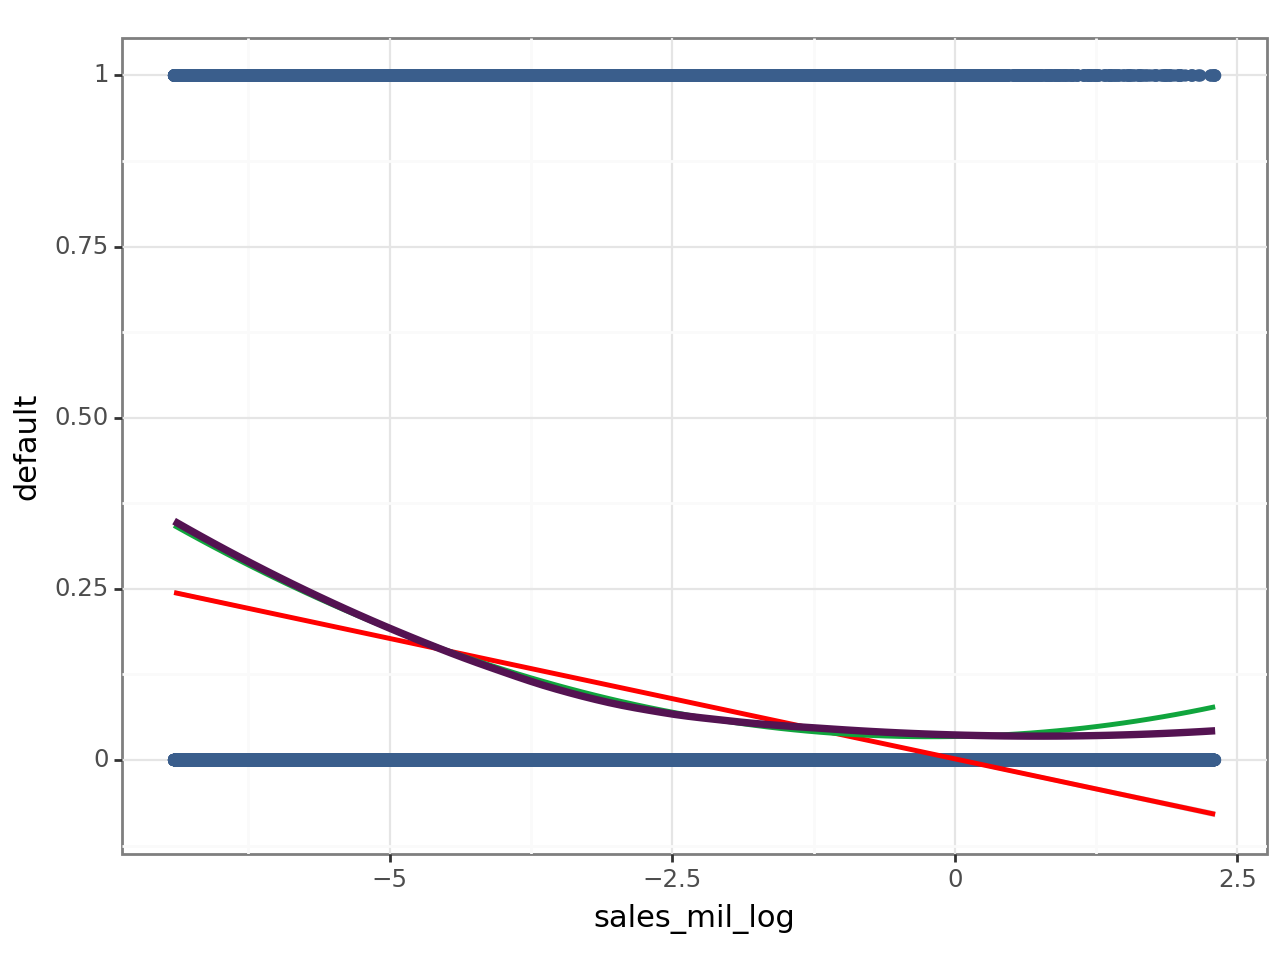

<Figure Size: (640 x 480)>

In [51]:
(
    ggplot(data, aes(x="sales_mil_log", y="default"))
    + geom_point(color=color[0])
    + geom_smooth(method = 'lm',color = 'red')
    + geom_smooth(method="lm", formula="y ~ x + I(x**2)", color=color[1], se=False)
    + geom_smooth(method="loess", color=color[2], se=False, size=1.5, span=0.9)
    + labs(x="sales_mil_log", y="default")
    + theme_bw()
)

In [52]:
# Linear regressions
ols_s = smf.ols("default ~ sales_mil_log + sales_mil_log_sq", data=data).fit()
print(ols_s.summary())

                            OLS Regression Results                            
Dep. Variable:                default   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     4674.
Date:                Tue, 27 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:32:21   Log-Likelihood:                -44159.
No. Observations:              197242   AIC:                         8.832e+04
Df Residuals:                  197239   BIC:                         8.836e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0343      0.002  

In [53]:
########################################################################
# sales change
########################################################################
# Note: graphs not in book

# lowess
data['d1_sales_mil_log'].describe(percentiles=[0.01, 0.05, 0.95, 0.99])

count    197242.000000
mean          0.017818
std           0.636712
min          -7.967947
1%           -1.943162
5%           -0.743172
50%           0.000000
95%           0.740446
99%           2.248594
max          12.420648
Name: d1_sales_mil_log, dtype: float64

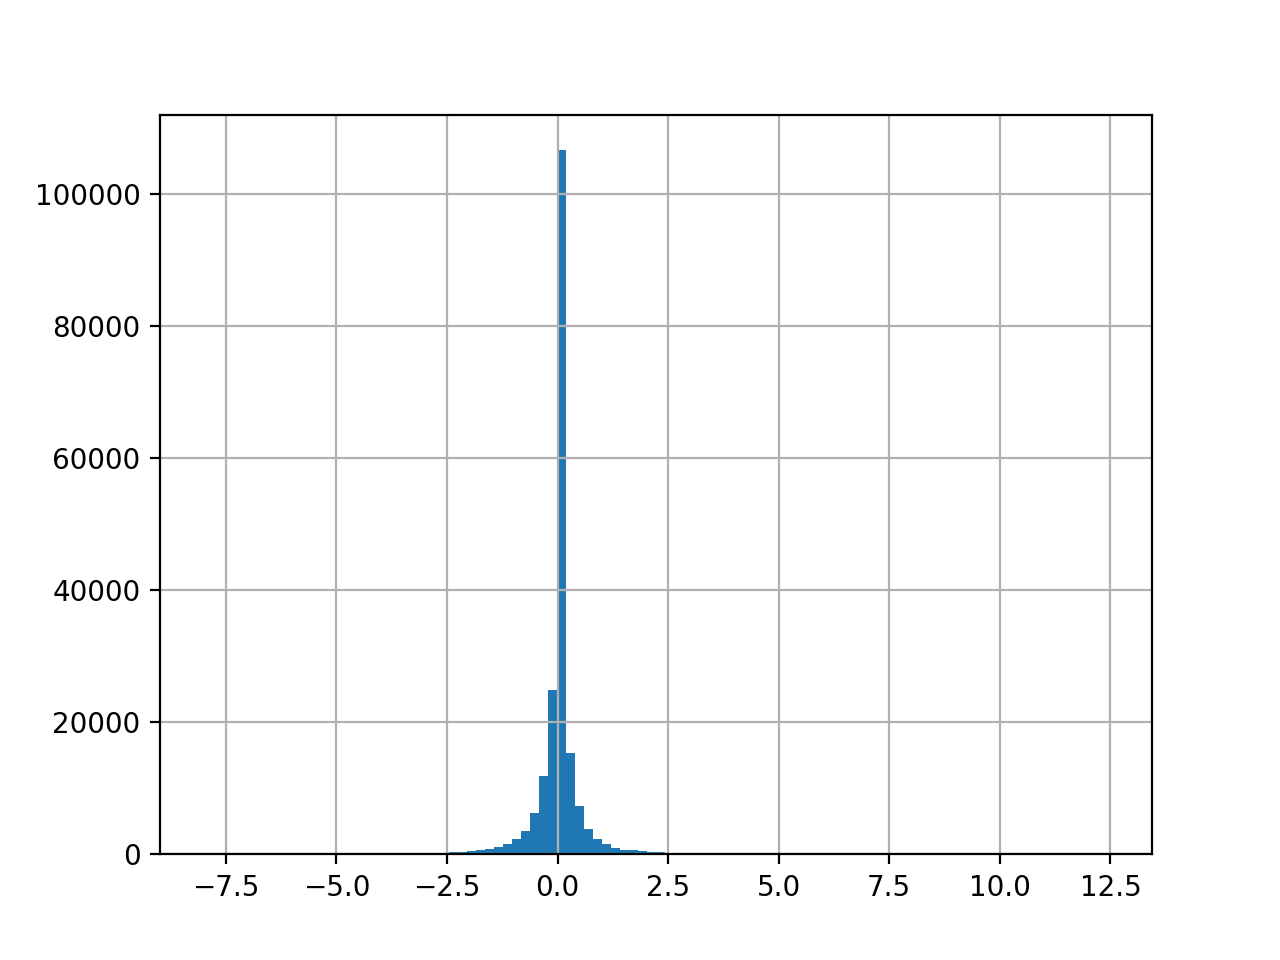

In [54]:
data['d1_sales_mil_log'].hist(bins=100)
plt.show()

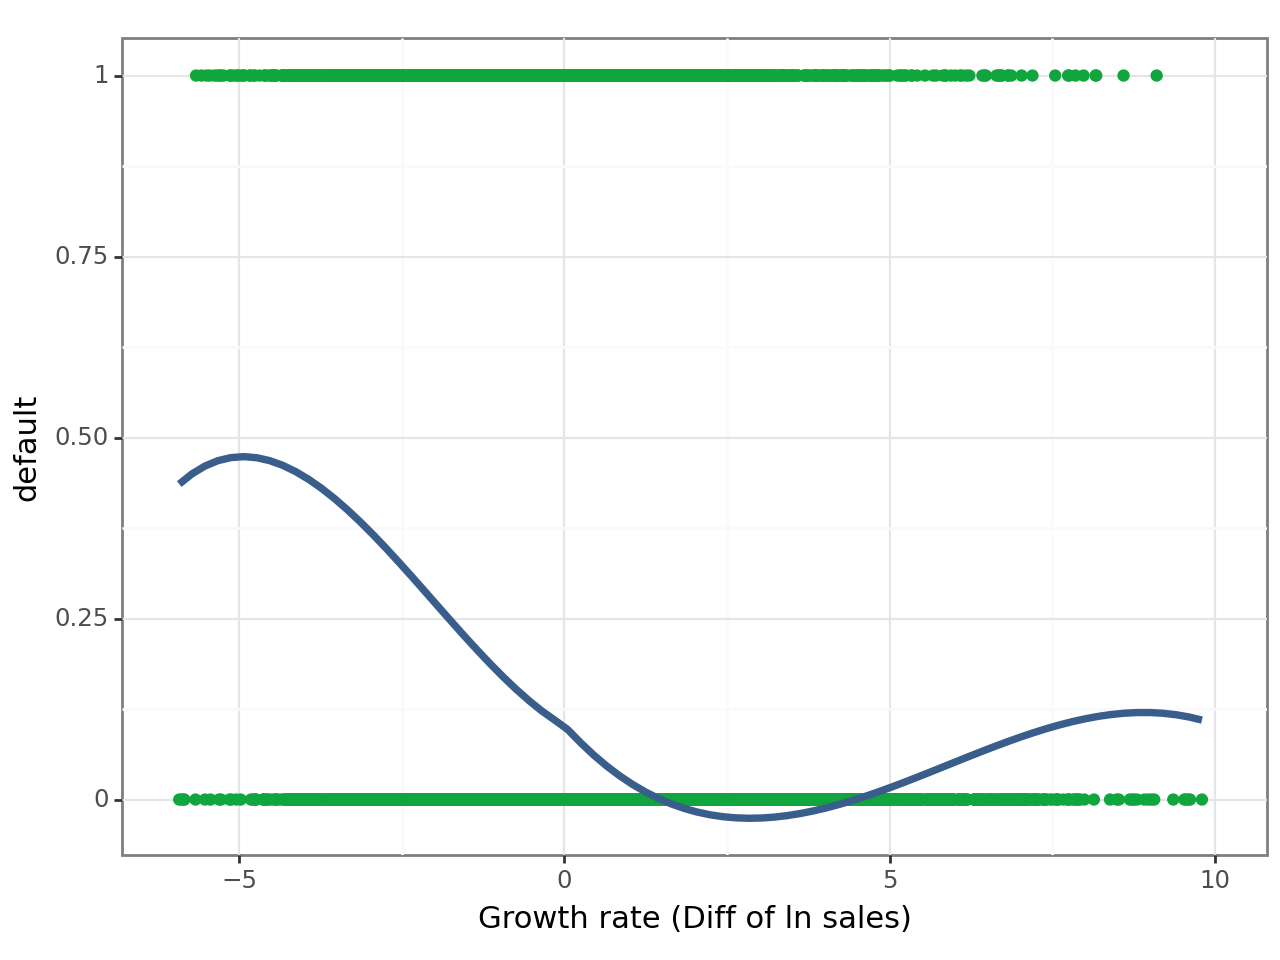

<Figure Size: (640 x 480)>

In [55]:
(
    ggplot(data, aes(x="d1_sales_mil_log", y="default"))
    + geom_point(color=color[1])
    + geom_smooth(method="loess", color=color[0], se=False, size=1.5, span=0.9)
    + labs(x="Growth rate (Diff of ln sales)", y="default")
    + scale_x_continuous(limits=(-6, 10), breaks=seq(-5, 10, by=5))
    + theme_bw()
)

In [56]:
(
    ggplot(data, aes(x="d1_sales_mil_log_mod", y="default"))
    + geom_point(color=color[1])
    + geom_smooth(method="loess", color=color[0], se=False, size=1.5, span=0.9)
    + labs(x="Growth rate (Diff of ln sales)", y="default")
    + scale_x_continuous(limits=(-6, 10), breaks=seq(-5, 10, by=5))
    + theme_bw()
)

PlotnineError: "Could not evaluate the 'x' mapping: 'd1_sales_mil_log_mod' (original error: name 'd1_sales_mil_log_mod' is not defined)"

In [57]:
# generate variables ---------------------------------------------------

data["flag_low_d1_sales_mil_log"] = np.where(data["d1_sales_mil_log"] < -1.5, 1, 0)
data["flag_high_d1_sales_mil_log"] = np.where(data["d1_sales_mil_log"] > 1.5, 1, 0)
data["d1_sales_mil_log_mod"] = np.where(
    data["d1_sales_mil_log"] < -1.5,
    -1.5,
    np.where(data["d1_sales_mil_log"] > 1.5, 1.5, data["d1_sales_mil_log"]),
)
data["d1_sales_mil_log_mod_sq"] = data["d1_sales_mil_log_mod"] ** 2

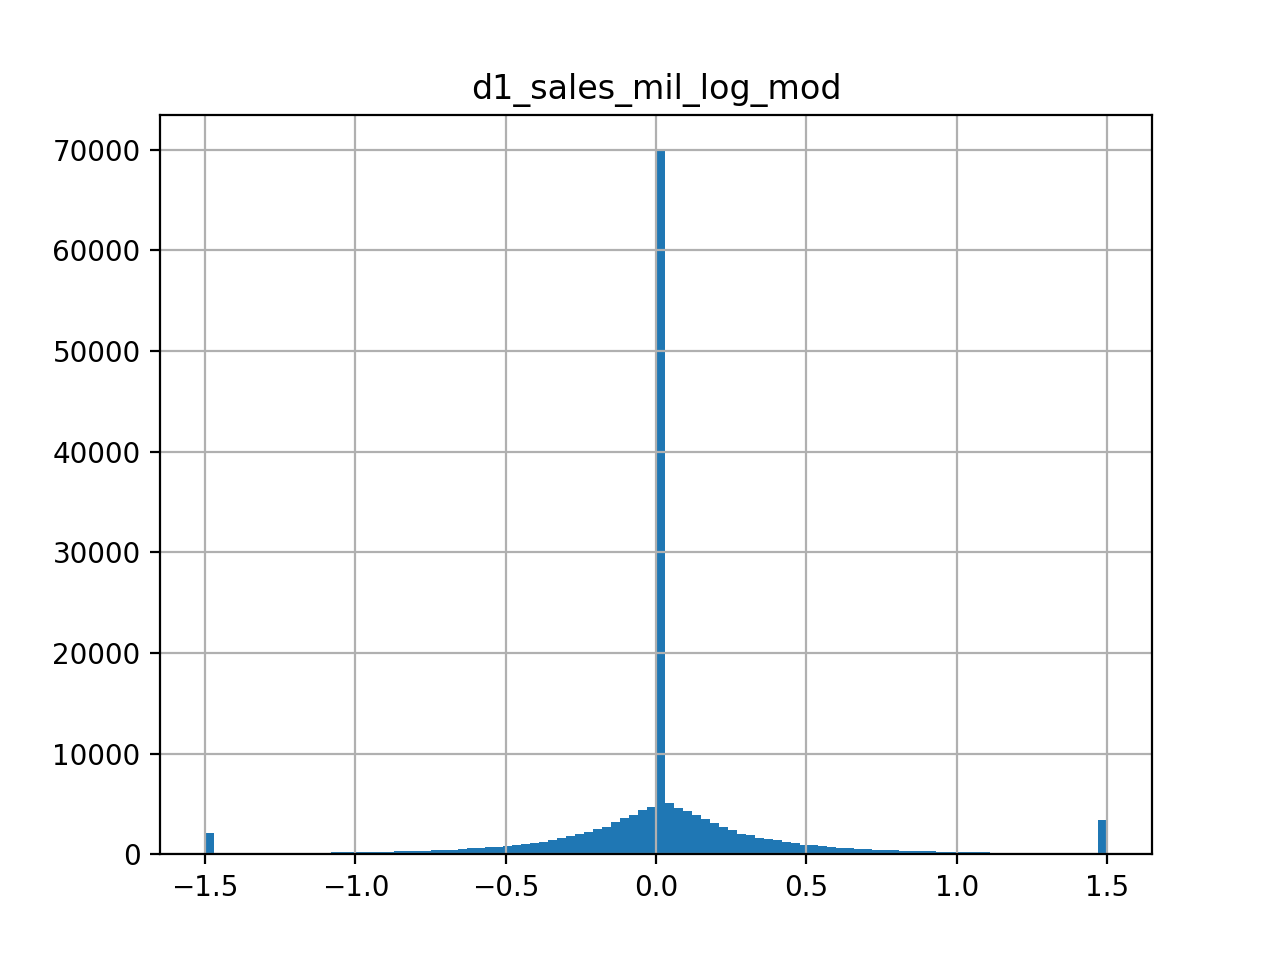

In [58]:
data.loc[data['default']== 0].hist("d1_sales_mil_log_mod",bins=100)
plt.show()

In [59]:
# no more imputation, drop obs if key vars missing
# data = data.dropna(subset=["liq_assets_bs", "foreign", "ind"])

# ha ezt belerakjuk akkor elcsúszik a holdout set megvizsgáltam úgy hogy előtte beillesztettem a holdout set-es részt és utána is

In [60]:
# drop missing
# data = data.dropna(subset=["age", "foreign", "material_exp_pl", "m_region_loc"])
data["age"].describe()

# ha ezt belerakjuk akkor elcsúszik a holdout set megvizsgáltam úgy hogy előtte beillesztettem a holdout set-es részt és utána is


count    157142.000000
mean          8.704000
std           6.312623
min           0.000000
25%           3.000000
50%           8.000000
75%          14.000000
max          63.000000
Name: age, dtype: float64

In [61]:
data[["age", "foreign", "material_exp_pl", "m_region_loc", "liq_assets_bs", "foreign", "ind"]].isna().sum()

age                40100
foreign            40077
material_exp_pl      334
m_region_loc         562
liq_assets_bs         77
foreign            40077
ind                 6885
dtype: int64

In [62]:
# drop unused factor levels
for col in data.select_dtypes(include=["category"]).columns:
    data[col] = data[col].cat.remove_unused_categories()

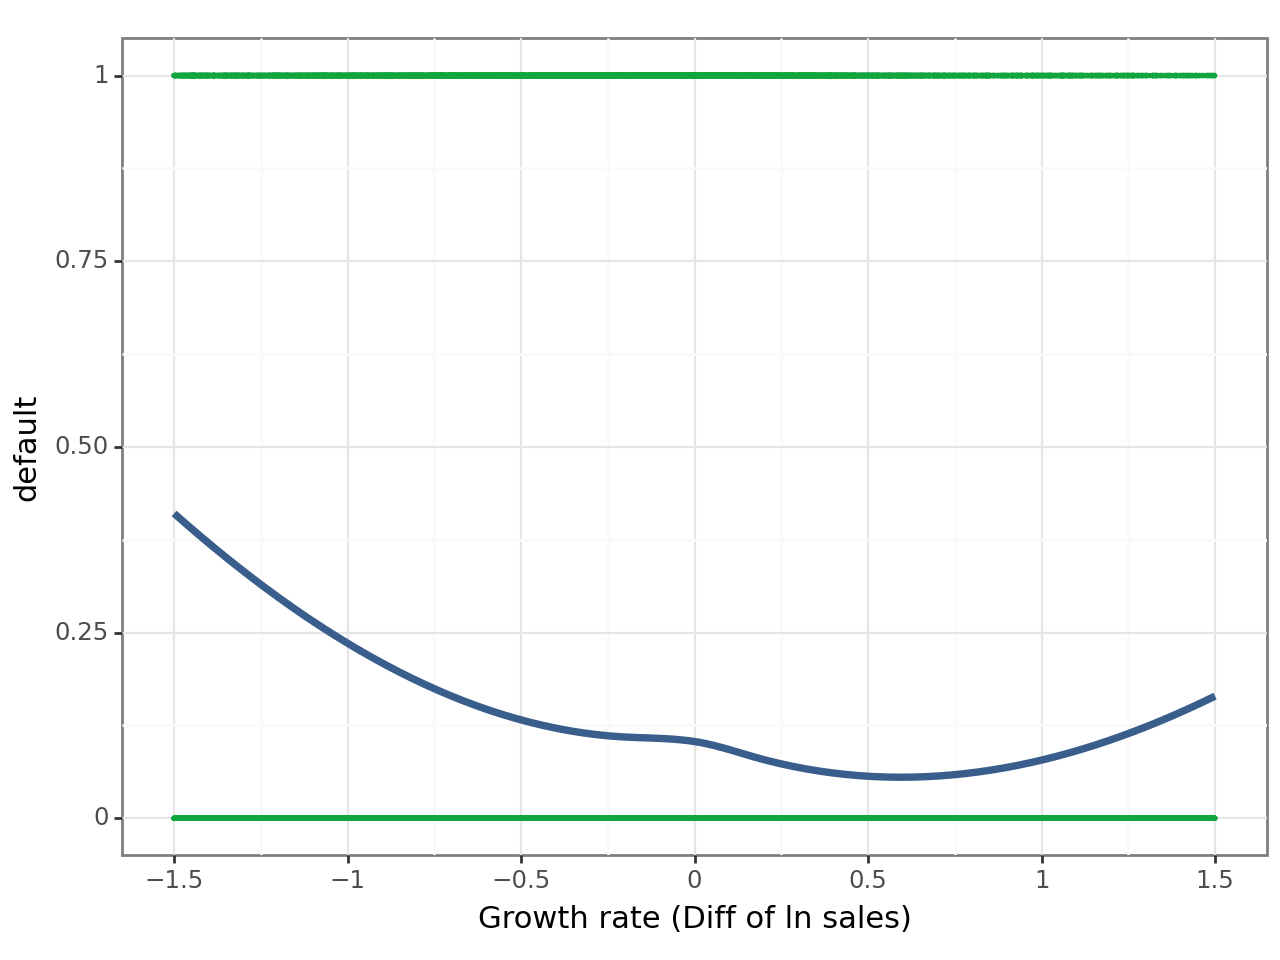

<Figure Size: (640 x 480)>

In [63]:
(
    ggplot(data, aes(x="d1_sales_mil_log", y="default"))
    + geom_point(size=0.1, color=color[1])
    + geom_smooth(method="loess", color=color[0], se=False, size=1.5, span=0.9)
    + labs(x="Growth rate (Diff of ln sales)", y="default")
    + scale_x_continuous(limits=(-1.5, 1.5), breaks=seq(-1.5, 1.5, by=0.5))
    + theme_bw()
)

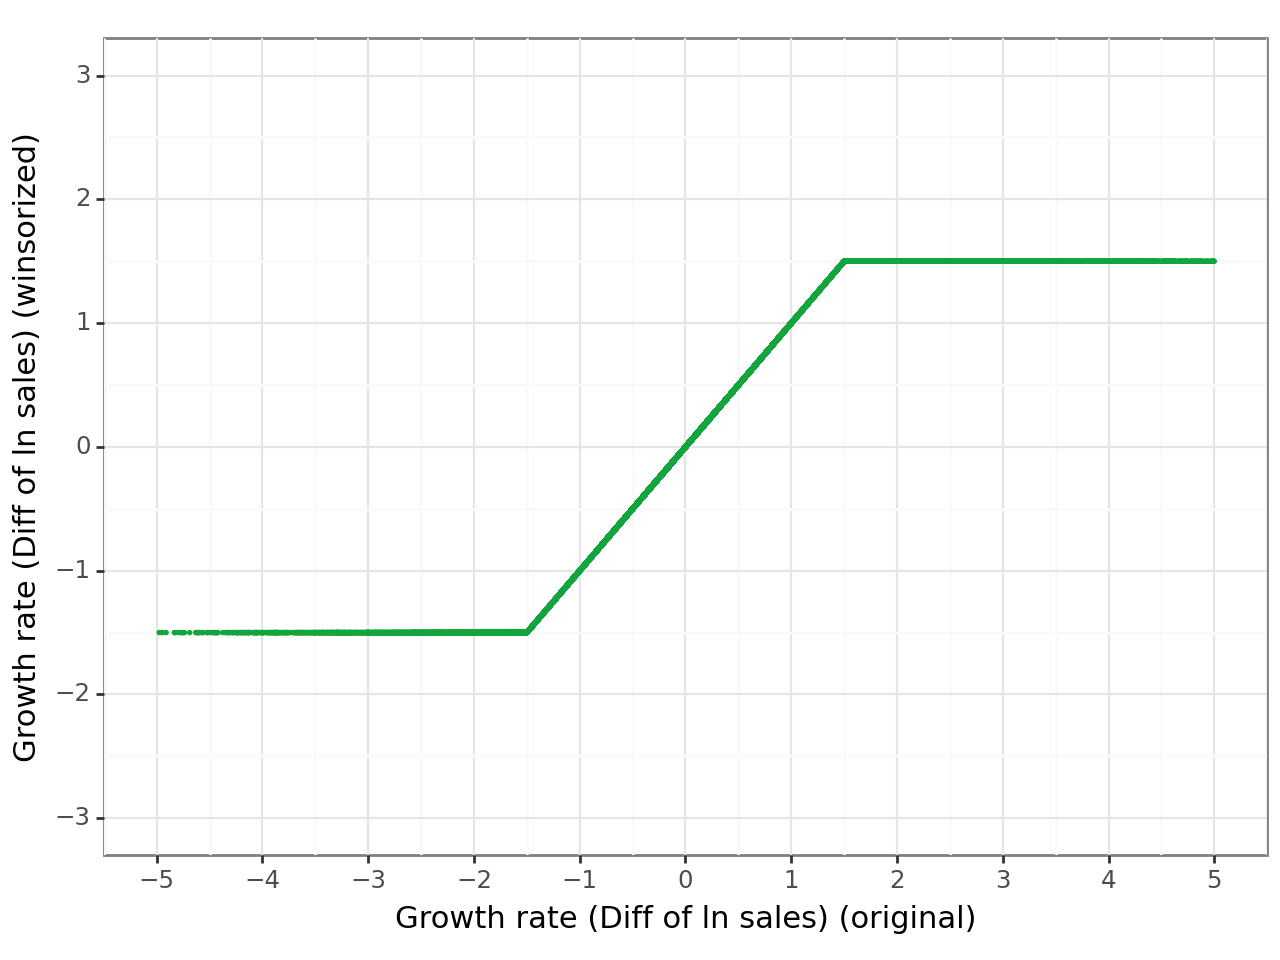

<Figure Size: (640 x 480)>

In [64]:
(
    ggplot(data, aes(x="d1_sales_mil_log", y="d1_sales_mil_log_mod"))
    + geom_point(size=0.1, color=color[1])
    + labs(
        x="Growth rate (Diff of ln sales) (original)",
        y="Growth rate (Diff of ln sales) (winsorized)",
    )
    + scale_x_continuous(limits=(-5, 5), breaks=seq(-5, 5, by=1))
    + scale_y_continuous(limits=(-3, 3), breaks=seq(-3, 3, by=1))
    + theme_bw()
)

In [65]:
# look at firms below 10m euro revenues and above 1000 euros (SME filtering)
#data = data.loc[(data['sales'] >= 1000) & (data['sales'] <= 10000000)]

# EDA

In [66]:
data[['year','comp_id']].groupby('year').nunique()

,comp_id
year,
2005,16111
2006,16420
2007,17821
2008,19058
2009,20541
2010,21166
2011,21648
2012,21723
2013,21464


In [67]:
data[['year','default','status_alive']].groupby('year').sum()

,default,status_alive
year,,
2005,1698,16111
2006,1345,16420
2007,1782,17821
2008,1761,19058
2009,2341,20541
2010,2664,21166
2011,2598,21648
2012,2589,21723
2013,2298,21464


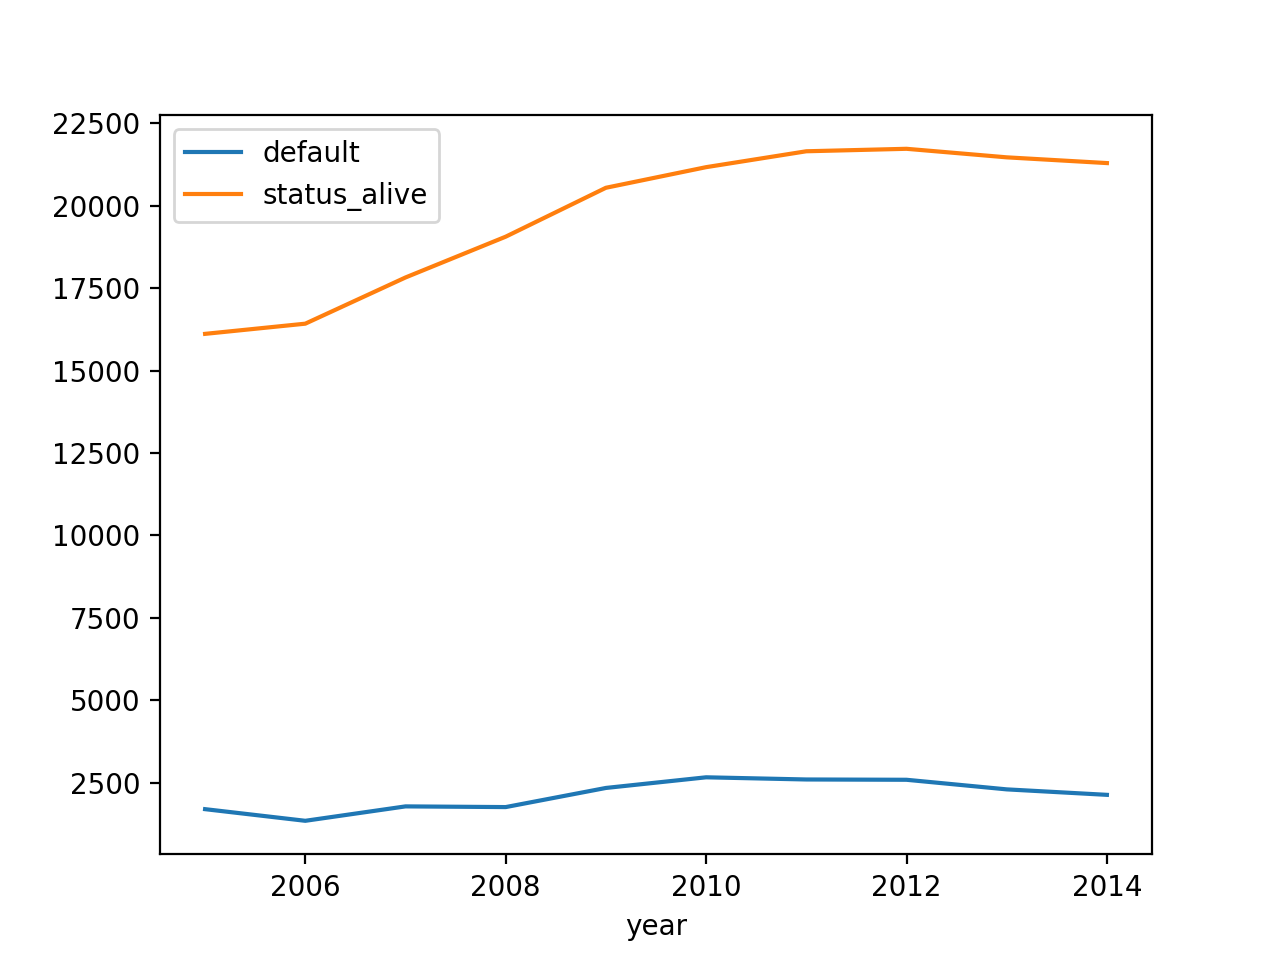

In [68]:
data[['year','default','status_alive']].groupby('year').sum().plot(kind='line')
plt.show()

In [69]:
data.default.mean()

0.1075227385648087

# Construction of the holdout set

We are only interested in predicting default for ‘ind2 == 26’, which is the selected industry, and the
firm is a small or medium enterprise (SME). Thus, yearly sales in 2014 was between 1000 EUR and 10
million EUR.

Existed in 2014 (sales > 0), but did not exists in 2015 (sales is 0 or missing)

If you do the sample design properly:
- you have an overall of 1037 firms.
- 56 firms defaulted
- 981 stayed alive. 
- The average sales of the firms is 0.4902 million EUR, with the minimum of 0.00107 million
EUR and 9.57648 million EUR.

In [70]:
# Creating the holdout set
holdout_set = data.loc[(data['ind2'] == 26) & (data['year'] == 2014) & (data['sales'] >= 1000) & (data['sales'] <= 10000000)]

# Display information about the resulting holdout set
print("Total firms in holdout set:", len(holdout_set))
print("Number of defaulted firms:", len(holdout_set[holdout_set['default'] == 1]))
print("Number of firms that stayed alive:", len(holdout_set[holdout_set['default'] == 0]))  # Since all firms meet the condition
print("Average sales of the firms:", holdout_set['sales'].mean())
print("Minimum sales:", holdout_set['sales'].min())
print("Maximum sales:", holdout_set['sales'].max())

Total firms in holdout set: 1037
Number of defaulted firms: 56
Number of firms that stayed alive: 981
Average sales of the firms: 490202.21792682
Minimum sales: 1070.370361328125
Maximum sales: 9576485.0



# Kérdések
- jó e az a szűrés hogy ind2 csak 26, nem lehet se empty se semmi más
- 1 évet nézünk vagy többet?
    - ha többet nézünk akkor rakhatnánk bele olyan változókat amik valamiféle trendeket, változásokat vagy több éven keresztüli átlagokat mutatnak
    - ha több évet nézünk akkor mi lesz azokkal a cégekkel, amik defaultolnak? bentmaradnak végig a táblázatban nan adatokkal - erre kéne egy szűrés, hogy kiessenek, de nem tudom melyik az a lépés ahol ennek ki kell jöbbie!

- SME sales-t vizsgálni
- CEU age 75? sokallom
    - itt olyan gondolatom van hogy majd a modellek fine tuneolálásnál az ilyen apró dolgok megváltoztatásával tudjuk egyedivé tenni a modellt
- Milyen hatása van az stack unstacknek? igazából csinál egy csomó NA sort, de ez alapján nem szabad megítélni h melyik sorban mennyi a hiányzó érték, inkább a default+aliveval lehetne talán - az se biztos, hogy jó
- a két dropos részt be kell raknunk valahova mert szerintem a nanok amiatt maradnak bent, de mi van ha a holdoutban van nan? akkor lehet predictálni, ahhoz nem kell h meglegyen az értékelk??



# Végig Gáborén favágással, nézzük meg mi jön ki minden finomhagolás nélkül!
nem sikerült, kurvasok hibára futottam, megpróbálom péterét

In [71]:
import os
import pandas as pd
import numpy as np
import sys
import patsy
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
import sklearn.metrics as metrics
from sklearn.metrics import brier_score_loss, roc_curve, auc, confusion_matrix, roc_auc_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

## Define helper functions

In [72]:
# Péter
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    
def create_coef_matrix(X, model):
    coef_matrix = pd.concat(
        [pd.DataFrame(X.columns),pd.DataFrame(model.coef_.flatten())], axis = 1
    )
    coef_matrix.columns = ['variable', 'coefficient']
    coef_matrix.iloc[-1] = ['Intercept', model.intercept_.flatten()[0]]
    return coef_matrix

def cv_summary(lambdas, C_values, model):
    d = {'lambdas': lambdas, 'C_values': C_values, 'mean_cv_score': model.scores_[1].mean(axis = 0)}
    return(pd.DataFrame(data=d))

def create_roc_plot(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    all_coords = pd.DataFrame({
        'fpr': fpr,
        'tpr': tpr,
        'thresholds': thresholds
    })
    
    plot = ggplot(all_coords, aes(x = 'fpr', y = 'tpr')) \
        + geom_line(color=color[0], size = 0.7) \
        + geom_area(position = 'identity', fill = 'mediumaquamarine', alpha = 0.3) \
        + xlab("False Positive Rate (1-Specifity)") \
        + ylab("True Positive Rate (Sensitivity)") \
        + geom_abline(intercept = 0, slope = 1,  linetype = "dotted", color = "black") \
        + scale_y_continuous(limits = (0, 1), breaks = seq(0, 1, .1), expand = (0, 0.01)) \
        + scale_x_continuous(limits = (0, 1), breaks = seq(0, 1, .1), expand = (0.01, 0)) \
        + theme_bw()
    return(plot)

def sigmoid_array(x):
    return(1 / (1 + np.exp(-x)))

def generate_fold_prediction(model, X, fold, param_index):
    fold_coef = model.coefs_paths_[1][fold,param_index,:]
    return(sigmoid_array(np.dot(X, np.transpose(fold_coef)[:-1]) +  np.transpose(fold_coef)[-1]))

def create_loss_plot(all_coords, optimal_threshold, curr_exp_loss):
    all_coords_copy = all_coords.copy()
    all_coords_copy['loss'] = (all_coords_copy.false_pos*FP + all_coords_copy.false_neg*FN)/all_coords_copy.n
    
    t = optimal_threshold
    l = curr_exp_loss
    
    plot = ggplot(all_coords_copy, aes(x = 'thresholds', y = 'loss')) + \
        geom_line(color=color[0], size=0.7) + \
        scale_x_continuous(breaks = seq(0, 1.1, by = 0.1)) + \
        coord_cartesian(xlim=(0,1))+ \
        geom_vline(xintercept = t , color = color[0] ) + \
        annotate(geom = "text", x = t - 0.01, y= max(all_coords_copy.loss) - 0.4,
                 label="best threshold: " + str(round(t,2)),
                 colour=color[1], angle=90, size = 7) +\
        annotate(geom = "text", x = t + 0.06, y= l,\
                 label= str(round(l, 2)), size = 7) +\
        theme_bw()
    return(plot)


def create_roc_plot_with_optimal(all_coords, optimal_threshold):
    all_coords_copy = all_coords.copy()
    all_coords_copy['sp'] = all_coords_copy.true_neg/all_coords_copy.neg
    all_coords_copy['se'] = all_coords_copy.true_pos/all_coords_copy.pos
    
    best_coords = all_coords_copy[all_coords_copy.thresholds == optimal_threshold]
    sp = best_coords.sp.values[0]
    se = best_coords.se.values[0]

    plot = ggplot(all_coords_copy, aes(x = 'sp', y = 'se')) +\
        geom_line(color=color[0], size=0.7) +\
        scale_y_continuous(breaks = seq(0, 1.1, by = 0.1)) +\
        scale_x_reverse(breaks = seq(0, 1.1, by = 0.1)) +\
        geom_point(data = pd.DataFrame({'sp': [sp], 'se': [se]})) +\
        annotate(geom = "text", x = sp, y = se + 0.03,
                 label = str(round(sp, 2)) + ', ' + str(round(se, 2)), size = 7) +\
        theme_bw()
    return(plot)


In [77]:
data.isna().sum()

year                          0
comp_id                       0
begin                         0
end                           0
amort                         0
                             ..
sales_mil_log_sq              0
flag_low_d1_sales_mil_log     0
flag_high_d1_sales_mil_log    0
d1_sales_mil_log_mod          0
d1_sales_mil_log_mod_sq       0
Length: 115, dtype: int64

In [76]:
data = data.dropna() # itt majd inkább impute

In [78]:
data.shape

(115237, 115)

## Define variable sets

### Separate train and holdout data

In [73]:
# Creating the holdout set
y_holdout = data.loc[(data['ind2'] == 26) & (data['year'] == 2014) & (data['sales'] >= 1000) & (data['sales'] <= 10000000)]

# Display information about the resulting holdout set
print("Total firms in holdout set:", len(y_holdout))
print("Number of defaulted firms:", len(y_holdout[y_holdout['default'] == 1]))
print("Number of firms that stayed alive:", len(y_holdout[y_holdout['default'] == 0]))  # Since all firms meet the condition
print("Average sales of the firms:", y_holdout['sales'].mean())
print("Minimum sales:", y_holdout['sales'].min())
print("Maximum sales:", y_holdout['sales'].max())

y_train = data.drop(y_holdout.index)

Total firms in holdout set: 1037
Number of defaulted firms: 56
Number of firms that stayed alive: 981
Average sales of the firms: 490202.21792682
Minimum sales: 1070.370361328125
Maximum sales: 9576485.0


In [74]:
print('Total')
print(data['default'].value_counts(normalize=True))
print('Train')
print(y_train['default'].value_counts(normalize=True))
print('Holdout')
print(y_holdout['default'].value_counts(normalize=True))

Total
0    0.892477
1    0.107523
Name: default, dtype: float64
Train
0    0.892194
1    0.107806
Name: default, dtype: float64
Holdout
0    0.945998
1    0.054002
Name: default, dtype: float64
